In [1]:
import warnings

warnings.filterwarnings("ignore")
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))

# Text Quality Analysis
To fine-tune an Aspect-Based Sentiment Analysis (ABSA) model effectively, we need a high-quality subset of labeled data that captures the nuances of sentiment across various aspects. Since manual labeling is resource-intensive, we’ll leverage pseudolabeling to annotate the data automatically, using a curated set of high-quality samples. 

The purpose of this approach is twofold: first, to ensure the ABSA model is trained on data that accurately reflects diverse sentiment patterns, and second, to enhance the model's ability to generalize across different contexts within the dataset. By prioritizing high-quality samples, we aim to maximize the model's interpretability and accuracy when identifying and analyzing aspect-specific sentiments in real-world applications.


## Import Libraries

In [2]:
from discover.container import DiscoverContainer
from discover.assets.idgen import AssetIDGen
from discover.core.flow import PhaseDef, DataPrepStageDef
from discover.app.tqa import TextQualityAnalysis
from discover.infra.utils.visual.print import Printer

# Params

In [3]:
PHASE = PhaseDef.DATAPREP
STAGE = DataPrepStageDef.TQA

## Dependency Container

In [4]:
container = DiscoverContainer()
container.init_resources()
container.wire(
    modules=[
        "discover.flow.data_prep.stage",
    ],
)

## Data Loading

In [5]:
# Get the assert id
idgen = AssetIDGen()
asset_id = idgen.get_asset_id(
    asset_type="dataset", phase=PHASE, stage=STAGE, name="review"
)
# Instantiate the repository
repo = container.repo.dataset_repo()
# Load the dataset from the repository
df = repo.get(asset_id, distributed=False).content
# Instantiate the Review object for analysis.

## Distribution of Text Quality Scores

## Sample from Most 

In [6]:
top_quartile_threshold = df["tqa_score"].quantile(0.75)
top_quartile_df = df.loc[df["tqa_score"] >= top_quartile_threshold]
sample_df = top_quartile_df.sample(n=5, random_state=55)
sample_df[
    [
        "tqm_pos_count_score",
        "tqm_pos_diversity_score",
        "tqm_structural_complexity_score",
        "tqm_pos_intensity_score",
        "tqm_tqa_check_score",
        "tqa_score",
    ]
]

,tqm_pos_count_score,tqm_pos_diversity_score,tqm_structural_complexity_score,tqm_pos_intensity_score,tqm_tqa_check_score,tqa_score
87874,0.025202,0.188101,0.303075,0.053191,0.054555,0.624125
144743,0.046371,0.202062,0.215951,0.059740,0.094467,0.618590
9903,0.012097,0.183675,0.267550,0.060000,0.095128,0.618450
139283,0.034274,0.205872,0.242797,0.055738,0.094608,0.633289
91689,0.041331,0.199586,0.222921,0.051250,0.094693,0.609780


In [ ]:
printer = Printer()
printer.print_dataframe_as_dict(
    df=sample_df[["app_name", "review_length", "tqa_score", "content"]],
    text_col="content",
    list_index=0,
    title=sample_df.iloc[0]["app_name"],
)

1. POS Counts: Number of nouns, verbs, adverbs, adjectives, and determiners
2. POS Diversity: Proportion of nouns, verbs, adverbs, adjectives, and determiners
3. POS Intensity: The normalized sum of nouns, verbs, adverbs, adjectives, and determiners
4. Structural Complexity: Unique word, and punctuation proportion and word length standard deviation 
5. Readability: The Flesch Reading Ease
6. Basic Statistics: Character, digit, word counts and proportions
7. Review Features: Review age, rating deviation from average, review length deviation from average.
8. Text Quality Indicators: Indicate presence of terminal punctuation, high readability, high digit repetition, high punctuation density. 

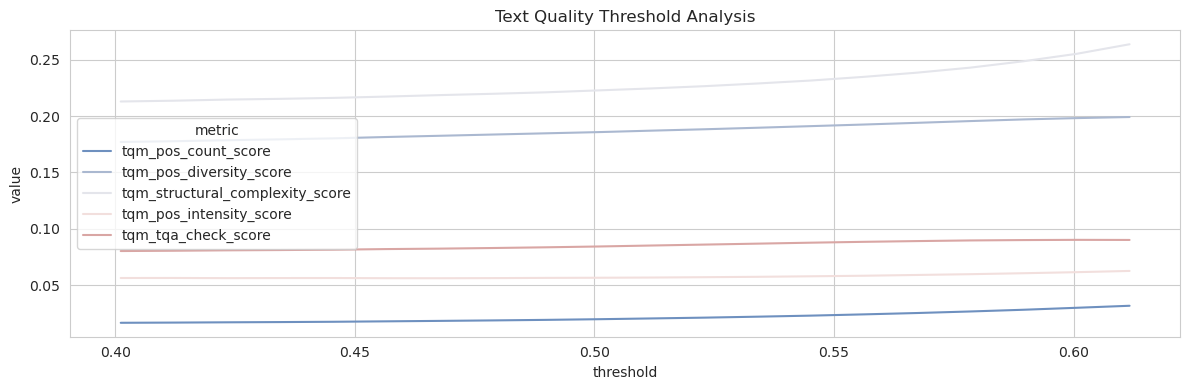

In [7]:
tqa = TextQualityAnalysis(df=df)
tqa.plot_thresholds(metrics=["review_length"])